<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Notebooks/202309_Modelos_de_lenguaje_usando_n_gramas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.0 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np

import re               # módulo operaciones expresiones regulares
import operator

import contractions
from collections import Counter
import random

import matplotlib.pyplot as plt


## Funciones

In [ ]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [ ]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''
  #quitar contracciones
  texto = contractions.fix(texto)

  #Convertir en mínusculas
  texto = texto.lower()

  #Quitar puntuación y números
  texto = re.sub('[^a-z]+', ' ', texto)

  return texto

In [ ]:
def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()

    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto)-N+1))
    return ngramas

# Leer y limpiar texto

obtener archivo [txt](https://github.com/sharanyavb/harry-potter/blob/master/Books_Text/HP1.txt)

In [ ]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2023-09-21 00:13:05--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt’

HP1.txt             100%[===================>] 480.47K  --.-KB/s    in 0.05s   

2023-09-21 00:13:05 (8.76 MB/s) - ‘HP1.txt’ saved [492006/492006]



In [ ]:
libro = leer_libro('/content/HP1.txt')

# lista con cadenas correspondientes al pie de página.
borrar = ['Page | {} Harry Potter and the Philosophers Stone -'.format(i)\
         for i in range(2,347)] + ['J.K. Rowling']

for tx in borrar:
    libro = libro.replace(tx, '')

libro

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  

In [ ]:
libro_limpio = limpiar_texto(libro)
libro_limpio[:1500]


'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you would expect to be involved in anything strange or mysterious because they just did not hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they did not think they could bear it if anyone found out about the potters mrs potter was mrs dursley s sister but they had not met for several years

# Distribución de probabilidad de las palabras en el libro

In [ ]:
palabras_frecuencia = Counter(libro_limpio.split())

# Counter es una "colección" donde los elementos encontrados en
# cualquier objeto iterable son guardados como claves de un
# diccionario y el conteo como valores

palabras_frecuencia

Counter({'the': 3640,
         'boy': 85,
         'who': 200,
         'lived': 9,
         'mr': 81,
         'and': 1924,
         'mrs': 46,
         'dursley': 57,
         'of': 1311,
         'number': 17,
         'four': 36,
         'privet': 16,
         'drive': 20,
         'were': 332,
         'proud': 7,
         'to': 1872,
         'say': 75,
         'that': 688,
         'they': 690,
         'perfectly': 5,
         'normal': 10,
         'thank': 9,
         'you': 1037,
         'very': 172,
         'much': 76,
         'last': 84,
         'people': 96,
         'would': 421,
         'expect': 13,
         'be': 366,
         'involved': 5,
         'in': 967,
         'anything': 72,
         'strange': 23,
         'or': 109,
         'mysterious': 6,
         'because': 91,
         'just': 180,
         'did': 297,
         'not': 1014,
         'hold': 12,
         'with': 416,
         'such': 21,
         'nonsense': 4,
         'was': 1262,
         'd

In [ ]:
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario de HP1: ', len(vocabulario))

Palabras en el vocabulario de HP1:  5701


In [ ]:
len(libro_limpio.split())

80572

Visualización de la probabilidad de ocurrencia de las 80 palabras más frecuentes

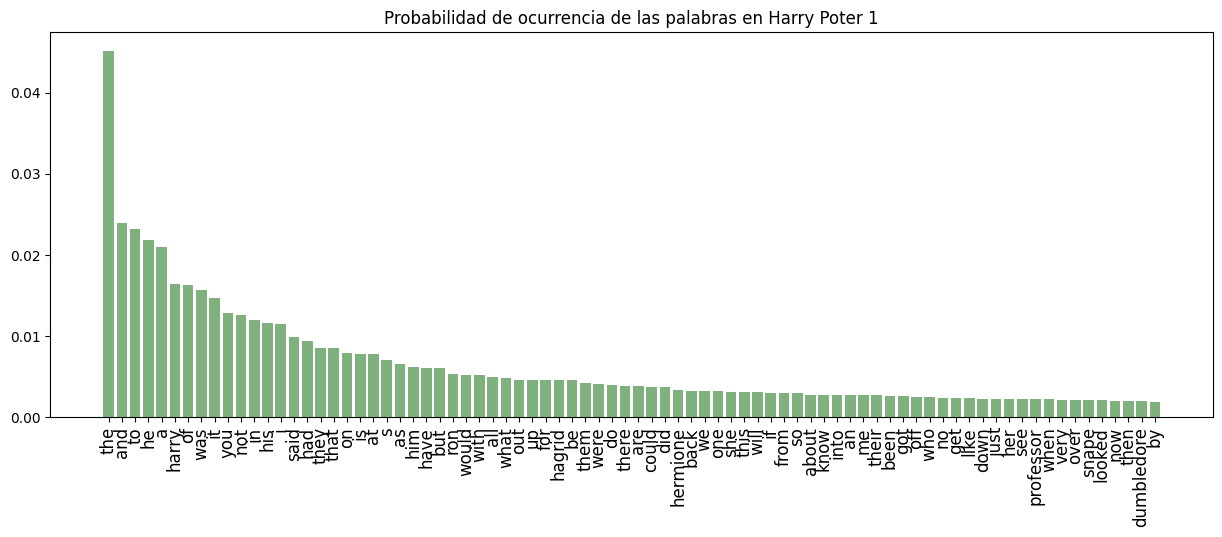

In [ ]:
Probabilidad_palabra = {k : v /len(libro_limpio.split()) for k, v in palabras_frecuencia.most_common(80)}

x, y  = zip(*sorted(Probabilidad_palabra.items(),key=operator.itemgetter(1), reverse=True))

fig = plt.figure(figsize=(15,5))
plt.bar(x,y,
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Harry Poter 1')
plt.show()

# Generación de Texto con Distribución Uniforme

1. Declaramos una lista vacía donde guardaremos las palabras que tendra el texto
2. Escojemos la primera palabra de forma aleatoria con distribución uniforme **texto en negrita**

In [ ]:
palabras = []  # inicializamos la lista de palabras

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

' '.join(palabras)

'compartments'

In [ ]:
long = 10
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
    palabras.append(palabra_selec)

' '.join(palabras)

'compartments slipping mumbling rigged cups crashing chickened shadowy failed creeps shortcuts'

lo que sería equivalente a lo siguiente:

In [ ]:
' '.join(np.random.choice(vocabulario,100))

'weak caughty meself beak hurry shrunk spirits forty lee daring sacked name while punch choose ranting mouse lump shredded balancing longbottom rocks flowing thronging liking outta monstrous overhearing downfall others crossly pewter stars work stopping strong early copyin dashing mixed pound lit ill flavored crept require accident patchwork clobbered trip foreheads transfixed party sizing hinges hitch heed chuckle post jerking voices undursleyish burning loops balloon tune grunt darting radish hind dormitories blur hedges staring sky hags aloud unraveled only visitors survive shouting world hovering pearly lavender silently hooked punctures buy poorer arrangements forgot pain stormed jc moldy deep galleons chatter'

# Generación de Texto con distribucción de palabras en HP

In [ ]:
' '.join(random.sample(libro_limpio.split(),100))    #Distribución en el libro

'discovery on you professor air to quaffle anythin although teachers shut he on harry take it grass tricks last open is dark away like not is fast is any harry large snare you his silently the no eye dursleys had again second me a for snape quick of and a by filch up will before would the down a as neck looking ron from teachers as enough force in short was the you boarded going son sipped fell hat do ollivander stand safe yeh ron as as neville the the of kept out her this going way to key with'

# Generación de texto usando N Gramas

In [ ]:
unigramas = palabras_frecuencia
print('Unigramas Unicos: ', len(unigramas), end='\n\n')
list(unigramas.items())[:10]

Unigramas Unicos:  5701



[('the', 3640),
 ('boy', 85),
 ('who', 200),
 ('lived', 9),
 ('mr', 81),
 ('and', 1924),
 ('mrs', 46),
 ('dursley', 57),
 ('of', 1311),
 ('number', 17)]

In [ ]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas Unicos: ', len(bigramas))
print('Bigrams Totales: ', sum(bigramas.values()), end='\n\n')
list(bigramas.items())[:15]

Bigramas Unicos:  41278
Bigrams Totales:  80571



[(('the', 'boy'), 27),
 (('boy', 'who'), 7),
 (('who', 'lived'), 3),
 (('lived', 'mr'), 1),
 (('mr', 'and'), 3),
 (('and', 'mrs'), 7),
 (('mrs', 'dursley'), 19),
 (('dursley', 'of'), 1),
 (('of', 'number'), 4),
 (('number', 'four'), 8),
 (('four', 'privet'), 1),
 (('privet', 'drive'), 16),
 (('drive', 'were'), 1),
 (('were', 'proud'), 2),
 (('proud', 'to'), 1)]

In [ ]:
trigramas = Counter(obtener_ngramas(libro_limpio,3))
print('Trigramas Unicos: ', len(trigramas))
print('Trigrams Totales: ', sum(trigramas.values()), end='\n\n')
list(trigramas.items())[100:115]

Trigramas Unicos:  69465
Trigrams Totales:  80570



[(('very', 'useful', 'as'), 1),
 (('useful', 'as', 'she'), 1),
 (('as', 'she', 'spent'), 1),
 (('she', 'spent', 'so'), 1),
 (('spent', 'so', 'much'), 1),
 (('so', 'much', 'of'), 1),
 (('much', 'of', 'her'), 1),
 (('of', 'her', 'time'), 1),
 (('her', 'time', 'craning'), 1),
 (('time', 'craning', 'over'), 1),
 (('craning', 'over', 'garden'), 1),
 (('over', 'garden', 'fences'), 1),
 (('garden', 'fences', 'spying'), 1),
 (('fences', 'spying', 'on'), 1),
 (('spying', 'on', 'the'), 1)]

### Probabilidad de la siguiente palabra
- **independiente** a las palabras anteriores (unigrama)
- **condicionada** a la(s) palabra(s) anteriores (n-gramas)

In [ ]:
# Probabilidad independiente
unigramas['the']/sum(unigramas.values())

0.04517698456039319

In [ ]:
# Probabilidad condicionada a la palabra anterior

bigramas['of', 'the']/unigramas['of'] # Podemos aproximar la probabilidad condicional
                                      # de que aparezca 'the' si ya tenemos la palabra 'of'


0.2334096109839817

In [ ]:
# Probabilidad condicionada a dos palabras anteriores

# Podemos aproximar la probabilidad condicional de que aparezca un trigrama si ya
# tenemos el bigrama correspondiente.

(trigramas['out', 'of', 'the'] / bigramas['out','of'])

0.42567567567567566

## Crear textos basadas en la probabilidad de ocurrencia

In [ ]:
from sys import ps2

def probabilidad_bigrama(p1, p2):
    if (p1, p2) not in bigramas:
        return 0
    # Probabilidad condicional de que salga p2 dado que ya salió p1
    return bigramas[p1, p2] / unigramas[p1]

def probabilidad_trigrama(p1, p2, p3):
    if (p1, p2, p3) not in trigramas:
        return 0
    # Probabilidad condicional de que salga p3 dado que ya salió p1 y p2
    return trigramas[p1, p2, p3] /bigramas[p1, p2]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatas = []

    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = unigramas[p] / sum(unigramas.values())
        Prob2 = probabilidad_bigrama(secuencia[-1], p) if len(secuencia) >= 1 else 0
        Prob3 = probabilidad_trigrama(secuencia[-2], secuencia[-1], p) if len(secuencia) >= 2 else 0

        # Usamos una interpolación lineal

        Probabilidad =   0.5*Prob1 + 4*Prob2 + 10*Prob3
        if Probabilidad < np.random.uniform():  # agragamos un componente de aleatoriedad
          continue
        lista_palabras_candidatas.append((p, Probabilidad))

    # orenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatas.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatas[0][0]


In [ ]:
palabras = []
longitud_texto = 20

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)


for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)


'streets in broad daylight not even when he was not going to be a bit of a great wizard you'

In [ ]:
palabras = []
longitud_texto = 60

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)


for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)


'screech got your own i think i am not going to be a bit of a tall black haired boy who was passing the gryffindor common room and the portrait hole was anyone s inside harry s heart gave a great wizard you know who was still there with the dursleys had never seen before were the only one who'